In [1]:
!pip install statsmodels --upgrade

3650 3640 10


<Axes: xlabel='Date'>

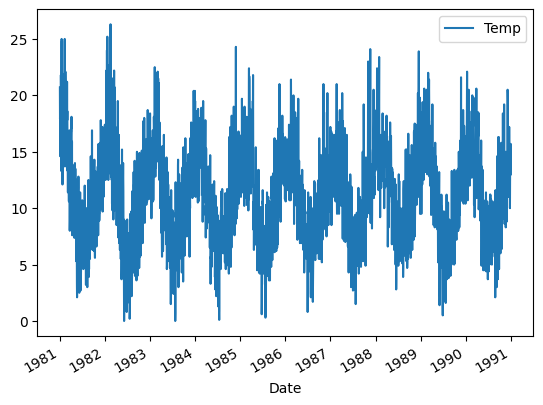

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
from sklearn.metrics import mean_squared_error

df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Colab-TimeSeriesBasics/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)
data = df.values
n = len(data)
ntrain = n - 10
ntest = 10
print(n, ntrain, ntest)
lag = 10
df.plot()

<Axes: xlabel='Date'>

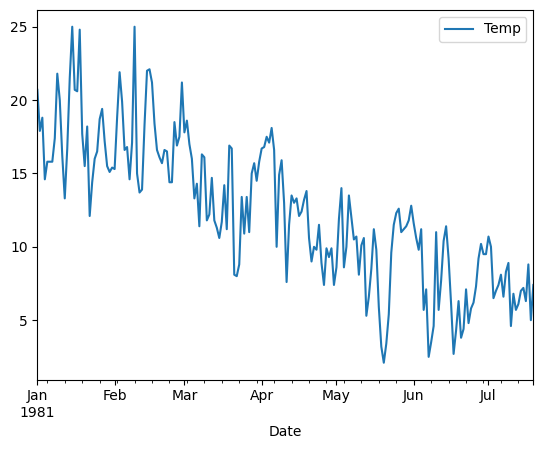

In [3]:
df[:200].plot()

In [4]:
# train autoregression
model = AutoReg(data[:ntrain], lags=lag).fit()
#print(model.summary())
print(model.params)

[ 0.93330774  0.61035296 -0.08326218  0.06281886  0.05167519  0.0542555
  0.04299553  0.05866995  0.03240321  0.05025581  0.03586639]


In [5]:
# prediction

preds = model.predict(start=ntrain, end=n-1)

# x = data[ntrain-lag:ntrain]
# preds = []
# for t in range(ntrain, n):
#    pred = ar.params[0] + np.sum(ar.params[1:]*x[::-1])
#    x[:lag-1], x[lag-1] = x[-(lag-1):], pred
#    preds.append(pred)

In [ ]:
rmse = sqrt(mean_squared_error(data[ntrain:],preds))
print('Test RMSE: %.3f' % rmse)

for i in range(ntrain, n):
  print(data[i], preds[i-ntrain])

Test RMSE: 1.416
[13.2] 13.06409837234238
[13.9] 13.343341410530465
[10.] 13.523468115422935
[12.9] 13.665203089463715
[14.6] 13.640215160026235
[14.] 13.674735288357013
[13.6] 13.610164802904064
[13.5] 13.464292698097761
[15.7] 13.321685268694312
[13.] 13.184575285742756


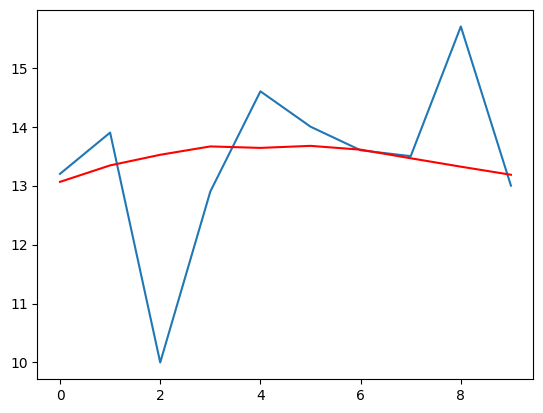

In [ ]:
# plot
plt.plot(data[ntrain:])
plt.plot(preds, color='red')
plt.show()

In [ ]:
pred_future = model.predict(start=n, end=n+6)
print(pred_future)

[13.12796012 13.10849995 13.08946242 13.05597028 13.00958285 12.95779002
 12.90115071]
